In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
sns.set(style = 'ticks', font_scale=0.9)
import pandas as pd

In [2]:
housing = pd.read_csv('Datasets/housing.csv',
                      names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
housing = housing[['CRIM','RM','LSTAT','MEDV']]
housing = housing.dropna(axis=0, how='any')
housing

,CRIM,RM,LSTAT,MEDV
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2
...,...,...,...,...
501,0.06263,6.593,9.67,22.4
502,0.04527,6.120,9.08,20.6
503,0.06076,6.976,5.64,23.9
504,0.10959,6.794,6.48,22.0


In [3]:
def normalize(df):
    sam=[]
    a=['CRIM','RM','LSTAT','MEDV']
    for i in a:
        y = df.loc[:, i]
        ys = list(preprocessing.scale(y)) 
        sam.append(pd.Series(ys, name=i))
    return pd.concat(sam,axis=1)

In [4]:
def cross_validate(model, df):
    x = df.loc[:, ['CRIM','RM','LSTAT']]
    y = df.loc[:, 'MEDV']
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    fig,ax = plt.subplots()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(ls = "--", lw = 0.25, color = "#4E616C")
    plt.plot(range(1,6), scores, marker = "o", mfc = "white", ms = 4, color='#15366F')
    x_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlabel("Times")
    plt.ylabel('Scores', rotation='horizontal', labelpad=20)
    plt.title('Cross Validation')
    plt.show()


In [5]:
def linear_regression(df):
    df = normalize(df)
    x = df.loc[:, ['CRIM','RM','LSTAT']]
    y = df.loc[:, 'MEDV']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
    print('X_train.shape={}, y_train.shape ={}, X_test.shape={}, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

    linreg = LinearRegression()
    model = linreg.fit(x_train, y_train)
    print("Model's parameters: ", model)
    print("Model's intercept: ", linreg.intercept_)
    print("Weight of parameters: ", linreg.coef_)

    y_pred = linreg.predict(x_test)
    print("MSE by sklearn: ", mean_squared_error(y_test, y_pred))
    print("R2 by sklearn: ", r2_score(y_test,y_pred))

    # plot curve
    fig,ax = plt.subplots(figsize=(15,5))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(ls = "--", lw = 0.25, color = "#4E616C")
    plt.plot(range(len(y_pred)), y_pred, label="predict", marker = "o", mfc = "white", ms = 4, color='#15366F')
    plt.plot(range(len(y_pred)), y_test, label="test", marker = "o", mfc = "white", ms = 4, color='#87D8F7')
    x_major_locator = MultipleLocator(10)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.legend()
    plt.ylabel('MEDV', rotation='horizontal', labelpad=20)
    plt.title('Test & Predict')
    plt.show()

    # cross validate
    cross_validate(linreg, df)
    


X_train.shape=(404, 3), y_train.shape =(404,), X_test.shape=(102, 3), y_test.shape=(102,)
Model's parameters:  LinearRegression()
Model's intercept:  -0.020167229872295092
Weight of parameters:  [-0.1119591   0.39802201 -0.43813765]
MSE by sklearn:  0.47343366591110614
R2 by sklearn:  0.5868162136929052


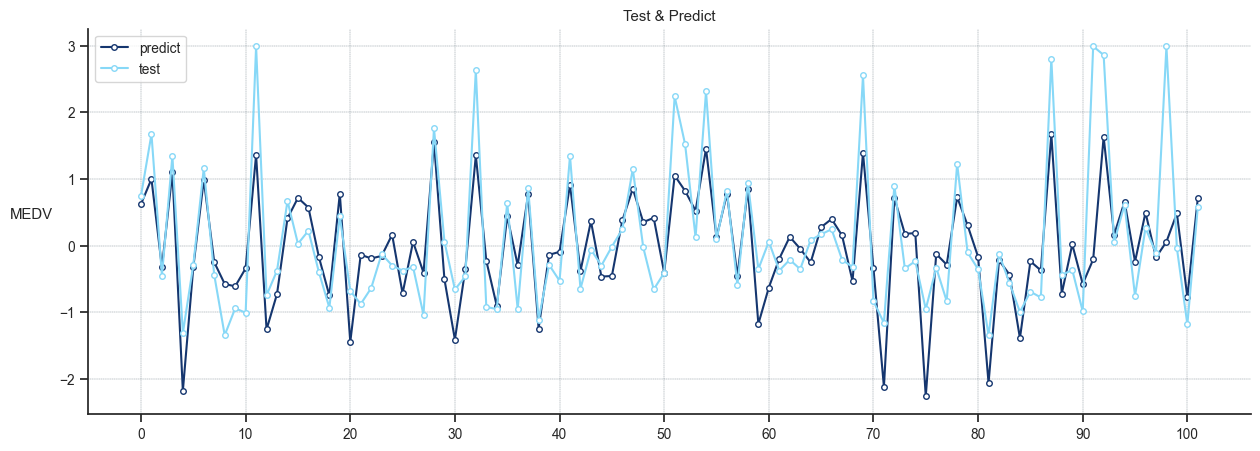

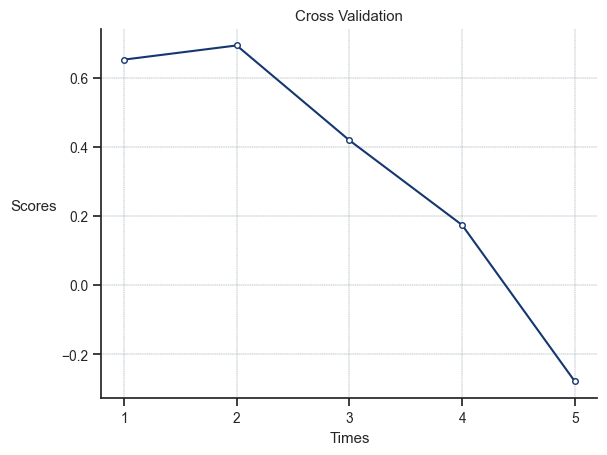

In [6]:
linear_regression(housing)